<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**k-means Clustering Introduction**    
*with Python and scikit-learn*    

from **[Getting started with k-means clustering in Python](https://blog.dominodatalab.com/getting-started-with-k-means-clustering-in-python)**    
by: Dr. J Rogel-Salazar on April 1, 2022    





---



Imagine you are an accomplished marketeer establishing a new campaign for a product and want to find appropriate segments to target, or you are lawyer interested in grouping together different documents depending on their content, or you are analysing credit card transactions to identify similar patterns. In all those cases, and many more, data science can be used to help clustering your data. Clustering analysis is an important area of unsupervised learning that helps us group data together. We have discussed in the Domino blog the [difference between supervised and unsupervised learning in the past](https://blog.dominodatalab.com/supervised-vs-unsupervised-learning). As a reminder, we use unsupervised learning when labelled data is not available for our purposes but we want to explore common features in the data. In the examples above, as a marketeer we may find common demographic characteristics in our target audience, or as a lawyer we establish different common themes in the documents in question or, as a fraud analyst we establish common transactions that may highlight outliers in someone’s account.    


In all those cases, clustering offers a hand at finding those common traces and there are a variety of clustering algorithms out there. In a previous Domino post,  we talked about [density based clustering](https://blog.dominodatalab.com/topology-and-density-based-clustering) where we discussed its use in anomaly detection, similar to the credit card transactions use-case above. In that post we argued that other algorithms may be easier to understand and implement, for example k-means, and the aim of this post if to do exactly that.    


We will first establish the notion of a cluster and determine an important part in the implementation of k-means: centroids. We will see how k-means approaches the issue of similarity and how the groups are updated on every iteration until a stopping condition is met. We will illustrate this with a Python implementation and will finish by looking at how to use this algorithm via the [Scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html#k-means).    


You can use the code in this post in your own machine or in Colab, provided you have Python 3.x installed.     




---



##K-Means - What Does It Mean?    

We mentioned that we are interested in finding out commonalities among our data observations. One way to determine that commonality or similarity is through a measure of distance among the data points. The shorter the distance, the more similar the observations are. There are different ways in which we can measure that distance and one that is very familiar to a lot of people is the Euclidean distance. That’s right! The same one we are taught when learning thePythagorean theorem. Let us take a look and consider two data observations over two attributes *a* and *b*. Point*p1*  has coordinates *(a1,b1)* and point *p2* has coordinates *(a2,b2)*.

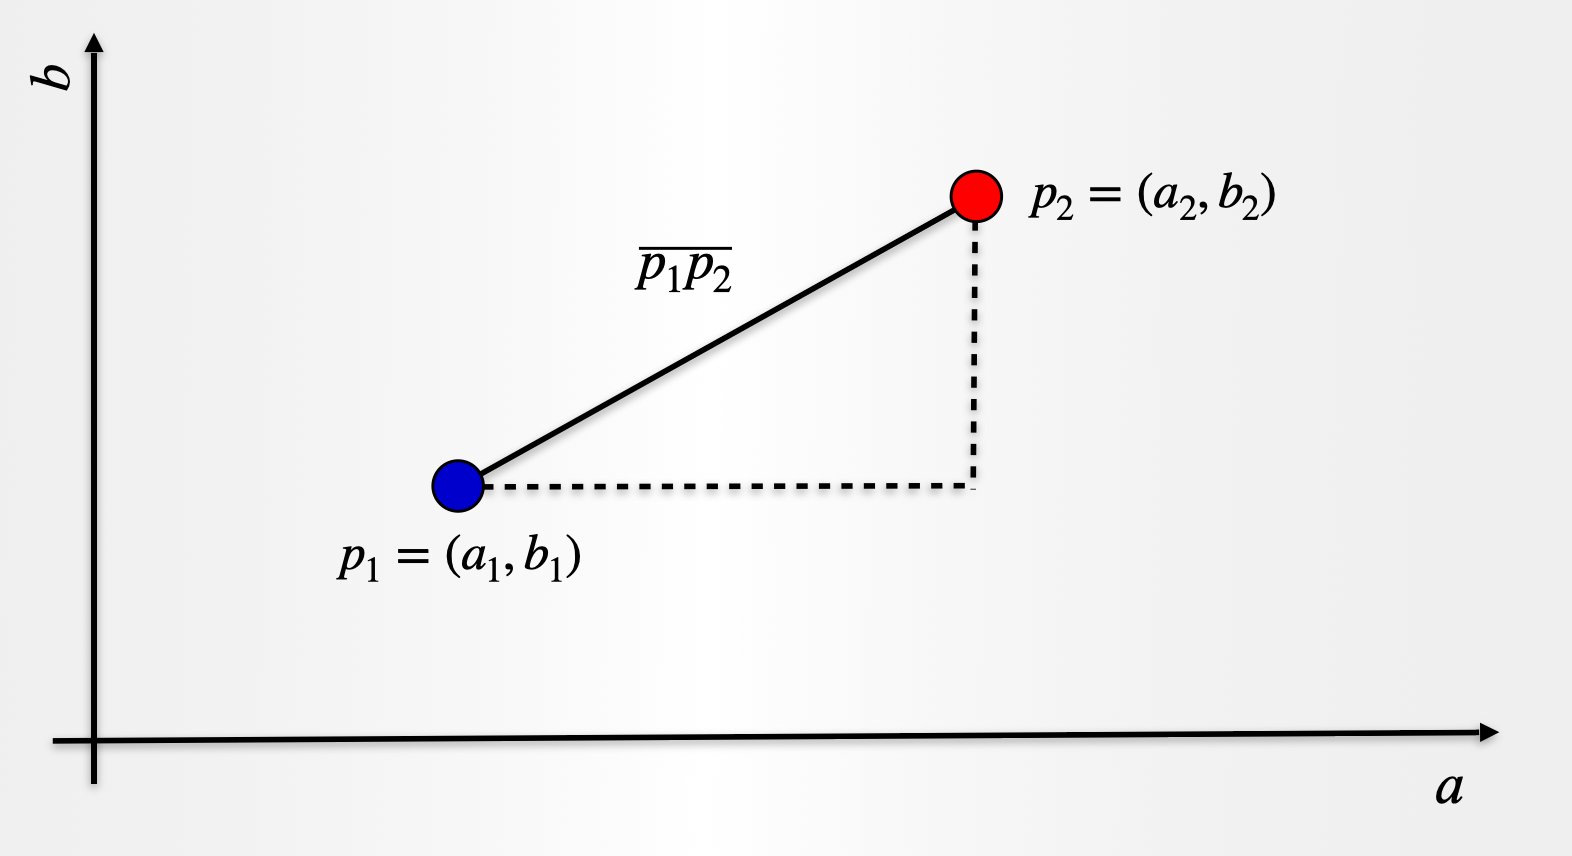

The distance *p1p2* is given by:

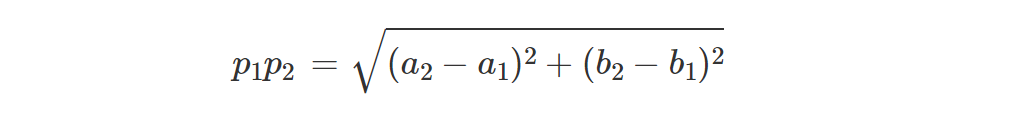

The expression above can be extended to more than 2 attributes and the distance can be measured between any two points. For a dataset with *n* observations, we assume there are *k* groups or clusters, and our aim is to determine which observation corresponds to any of those *k* groups. This is an important point to emphasise: the algorithm will not give us the number of clusters, instead we need to define the number *k* in advance. We may be able to run the algorithm with different values for *k* and determine the best possible solution.

In a nutshell, *k*-means clustering tries to minimise the distances between the observations that belong to a cluster and maximise the distance between the different clusters. In that way, we have cohesion between the observations that belong to a group, while observations that belong to a different group are kept further apart. Please note that as we explained in this post, *k*-means is exhaustive in the sense that every single observation in the dataset will be forced to be part of one of the *k* clusters assumed.

It should now be clear where the *k* in *k*-means comes from, but what about the “means” part? Well, it turns out that as part of the algorithm we are also looking to identify the centre for each cluster. We call this a *centroid*, and as we assign observations to one cluster or the other, we update the position of the cluster *centroid*. This is done by taking the mean (average if you will) of all the data points that have been included in that cluster. Easy!

##A Recipe for k-means

The recipe for *k*-means is quite straightforward.    

1.  Decide how many clusters you want, i.e. choose *k*    
2.  Randomly assign a centroid to each of the *k* clusters    
3.  Calculate the distance of all observation to each of the *k* *centroids*    
4.  Assign observations to the closest *centroid*    
5.  Find the new location of the *centroid* by taking the mean of all the observations in each cluster    
6.  Repeat steps 3-5 until the centroids do not change position   

Et voilà!    

Take a look at the representation below where the steps are depicted in a schematic way for a 2-dimensional space. The same steps can be applied to more dimensions (i.e. more features or attributes). For simplicity, in the schematic we only show the distance measured to the closest centroid, but in practice all distances need to be considered.

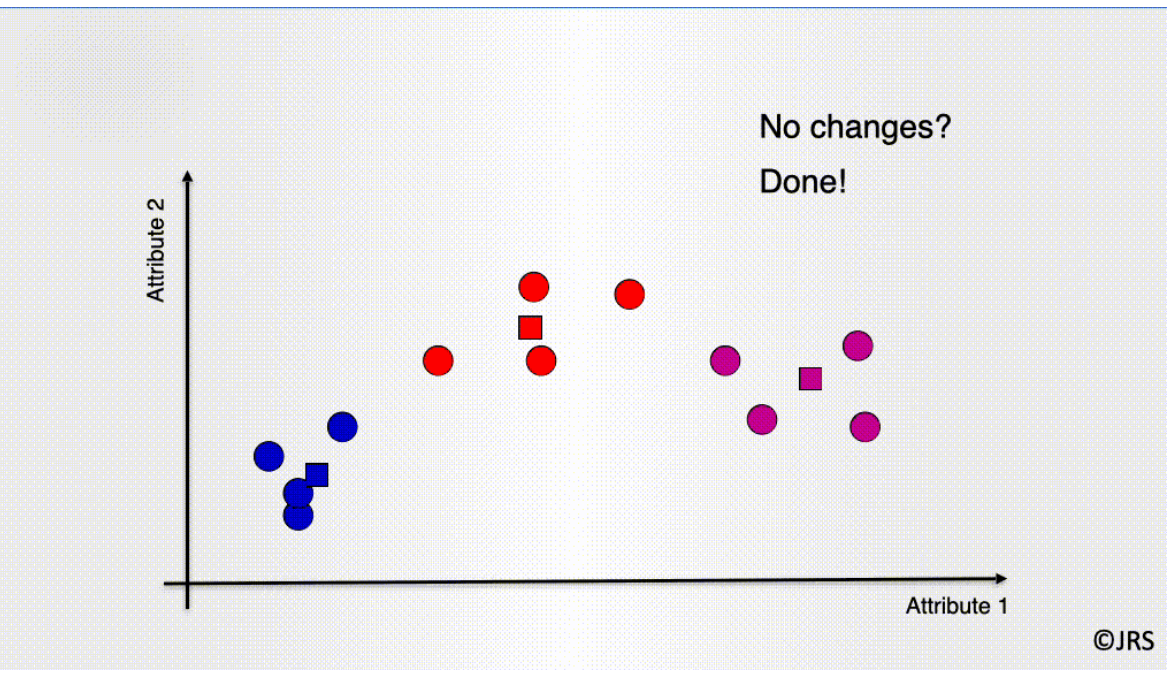

*note: see [the original post by Dr. J Rogel-Salazar](https://blog.dominodatalab.com/getting-started-with-k-means-clustering-in-python) for an animated graphic which builds to the final image above.* 

For the purposes of our implementation, we will take a look at some data with 2 attributes for simplicity. We will then look at an example with more dimension. To get us started we will use a dataset we have prepared and it is available [here](https://figshare.com/ndownloader/files/33950939) with the name **kmeans_blobs.csv**. The data set contains 4 columns with the following information:    

1. ID: A unique identifier for the observation    
2. x: Attribute corresponding to an x coordinate    
3. y: Attribute corresponding to a y coordinate    
4. Cluster: An identifier for the cluster the observation belongs to    


We will discard column 4 for our analysis, but it may be useful to check the results of the application of *k*-means. We will do this in our second example later on. Let us start by reading the dataset:

*note: the **kmeans_blobs.csv** file should be loaded to your current working directory.      
[A copy of the file may also be found on Professor Patrick's Google Drive.](https://drive.google.com/file/d/1xthprqwNf94lY1_sjTMpK4j3MGpXn3DM/view?usp=sharing)*

In [ ]:
# be sure to have the file kmeans_blobs.csv in your current working directory
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

blobs = pd.read_csv('kmeans_blobs.csv')
colnames = list(blobs.columns[1:-1])
blobs.head() 


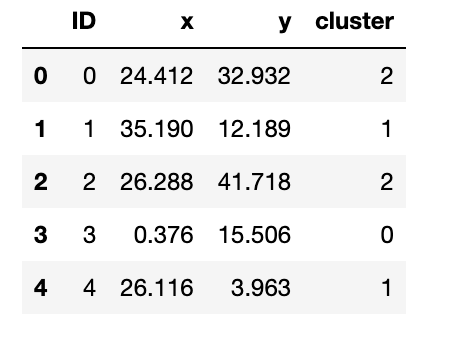

Let us look at the observations in the dataset. We will use the Cluster column to show the different groups that are present in the dataset. Our aim will be to see if the application of the algorithm reproduces closely the groupings.

In [ ]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
            c=blobs['cluster'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Let's now look at our recipe.

###Steps 1 and 2 - Define *k* and initiate the centroids

First we need 1) to decide how many groups we have and 2) assign the initial centroids randomly. In this case let us consider *k=3* , and as for the *centroids*, well, they have to be in the same range as the dataset itself. So one option is to randomly pick *k* observations and use their coordinates to initialise the centroids:

In [ ]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)
centroids


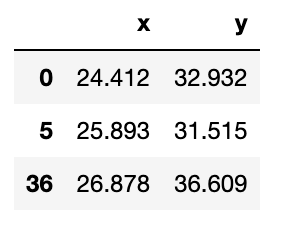

###Step 3 - Calculate distance    

We now need to calculate the distance between each of the centroids and the data points. We will assign the data point to the centroid that gives us the minimum error. Let us create a function to calculate the root of square errors:

In [ ]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

Let us pick a data point and calculate the error so we can see how this works in practice. We will use point , which is in fact one of the centroids we picked above. As such, we expect that the error for that point and the third centroid is zero. We therefore would assign that data point to the second centroid. Let’s take a look:

In [ ]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

In [ ]:
Error for centroid 0: 384.22

Error for centroid 1: 724.64

Error for centroid 2: 0.00

###Step 4 - Assign centroids    

We can use the idea from Step 3 to create a function that helps us assign the data points to corresponding centroids. We will calculate all the errors associated to each centroid, and then pick the one with the lowest value for assignation:

In [ ]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors


Let us add some columns to our data containing the centroid assignations and the error incurred. Furthermore, we can use this to update our scatter plot showing the centroids (denoted with squares) and we colour the observations according to the centroid they have been assigned to:

In [ ]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head() 
